# **Preparations**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/MyDrive/FruitNet-Dataset/Apple'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['valid', 'train']

Contents of train directory:
['bad', 'good']

Contents of validation directory:
['bad', 'good']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training cat/dog pictures
train_bad_dir = os.path.join(train_dir, 'bad')
train_good_dir = os.path.join(train_dir, 'good')

# Directory with validation cat/dog pictures
validation_bad_dir = os.path.join(validation_dir, 'bad')
validation_good_dir = os.path.join(validation_dir, 'good')

In [ ]:
train_bad_fnames = os.listdir(train_bad_dir)
train_good_fnames = os.listdir(train_good_dir)

print(train_bad_fnames[:10])
print(train_good_fnames[:10])

['IMG20200728175856.jpg', 'IMG20200728175909.jpg', 'IMG20200728175908.jpg', 'IMG20200728175907.jpg', 'IMG20200728175912.jpg', 'IMG20200728175910.jpg', 'IMG20200728175927.jpg', 'IMG20200728175919.jpg', 'IMG20200728175917.jpg', 'IMG20200728175913.jpg']
['20190809_115451.jpg', '20190809_115448.jpg', '20190809_115459.jpg', '20190809_115527.jpg', '20190809_115505.jpg', '20190809_115613.jpg', '20190809_115547.jpg', '20190809_115606.jpg', '20190809_115534.jpg', '20190809_115602.jpg']


In [ ]:
print('total training `bad` images:', len(os.listdir(train_bad_dir)))
print('total training `good` images:', len(os.listdir(train_good_dir)))

print('total validation `bad` images:', len(os.listdir(validation_bad_dir)))
print('total validation `good` images:', len(os.listdir(validation_good_dir)))

total training `bad` images: 902
total training `good` images: 912
total validation `bad` images: 117
total validation `good` images: 120


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

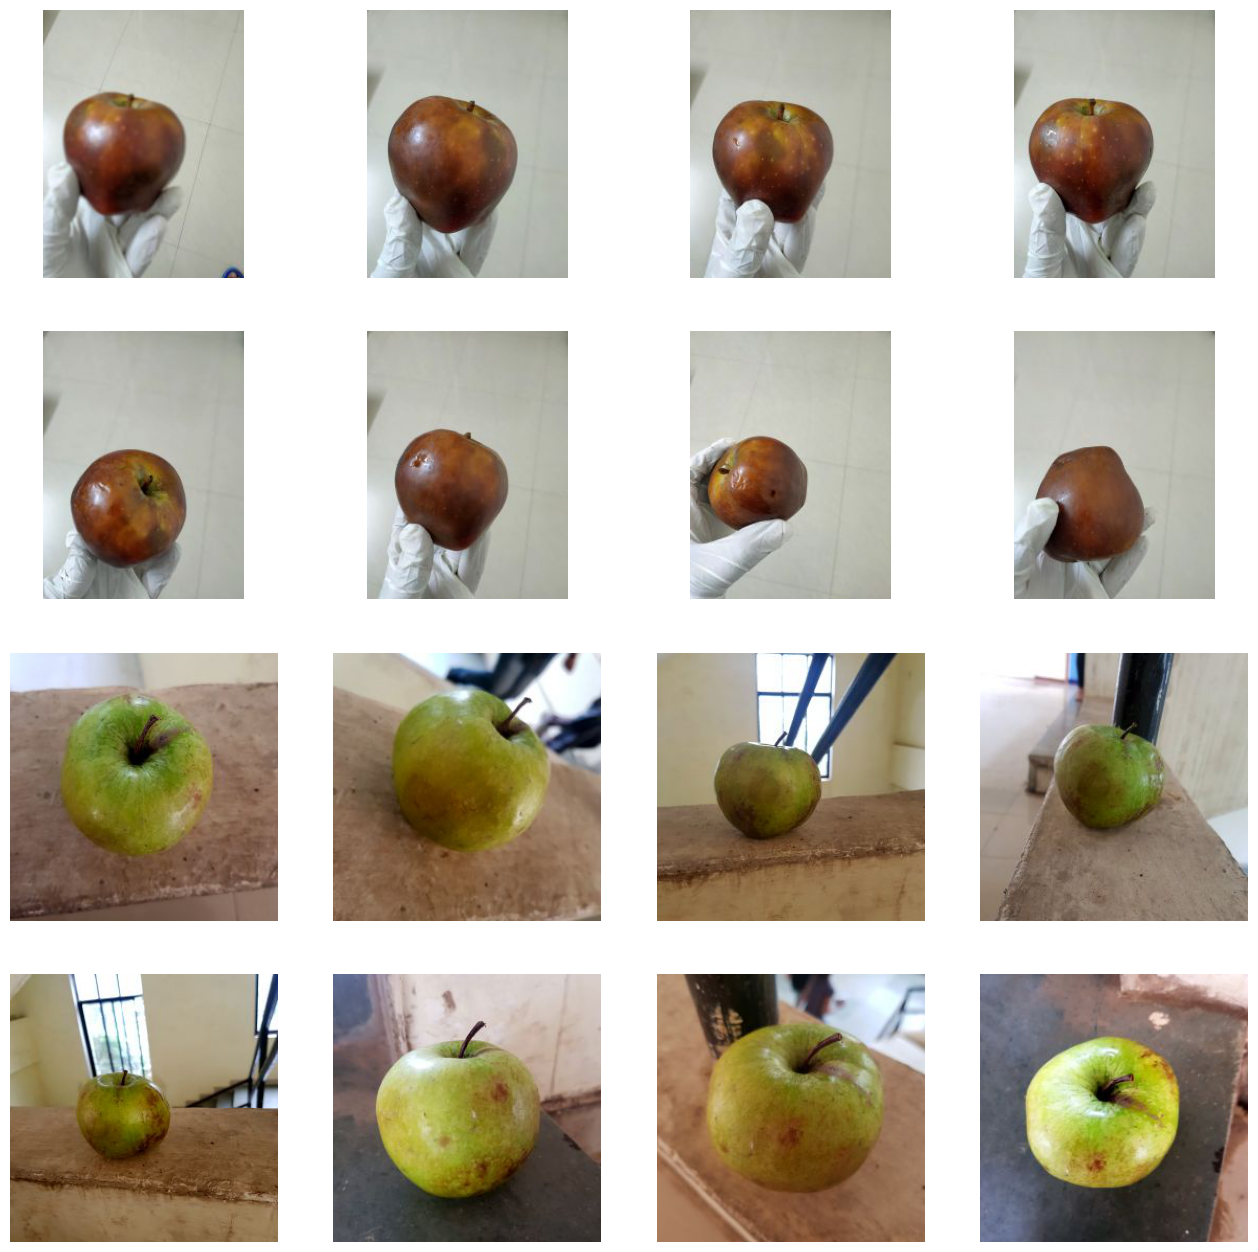

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_bad_pix = [os.path.join(train_bad_dir, fname) 
                for fname in train_bad_fnames[pic_index-8 : pic_index] 
               ]

next_good_pix = [os.path.join(train_good_dir, fname) 
                for fname in train_good_fnames[ pic_index-8 : pic_index]
               ]

for i, img_path in enumerate(next_bad_pix + next_good_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# **Self-Created Model Arch with Non-Augmented Data & No Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 1814 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
    )

Epoch 1/50
57/57 [==============================] - 286s 5s/step - loss: 0.5048 - accuracy: 0.7834 - val_loss: 0.2578 - val_accuracy: 0.8776
Epoch 2/50
57/57 [==============================] - 7s 117ms/step - loss: 0.1441 - accuracy: 0.9416 - val_loss: 0.1680 - val_accuracy: 0.9241
Epoch 3/50
57/57 [==============================] - 7s 118ms/step - loss: 0.0664 - accuracy: 0.9708 - val_loss: 0.1715 - val_accuracy: 0.9241
Epoch 4/50
57/57 [==============================] - 8s 136ms/step - loss: 0.1078 - accuracy: 0.9647 - val_loss: 0.1020 - val_accuracy: 0.9620
Epoch 5/50
57/57 [==============================] - 7s 119ms/step - loss: 0.0940 - accuracy: 0.9686 - val_loss: 0.0866 - val_accuracy: 0.9578
Epoch 6/50
57/57 [==============================] - 9s 151ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.0868 - val_accuracy: 0.9705
Epoch 7/50
57/57 [==============================] - 7s 115ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.1308 - val_accuracy: 0.9789
Epoch 8

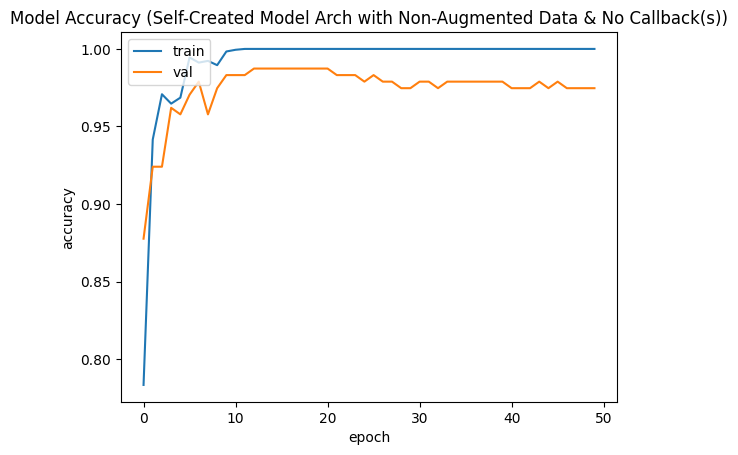

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

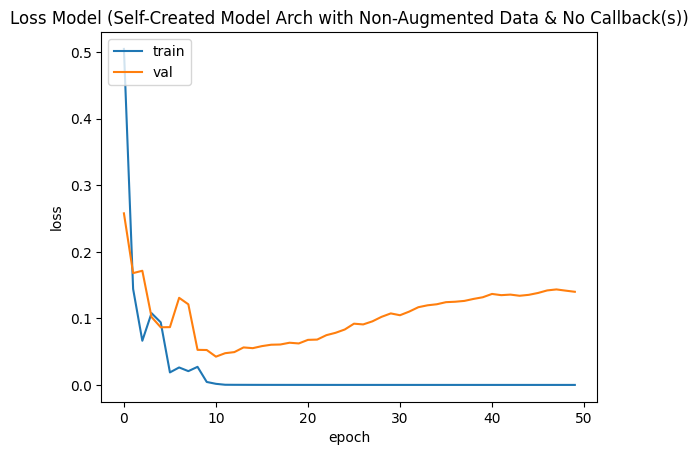

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Self-Created Model Arch with Augmented Data & Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 256)     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 1814 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/self_created'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.7482 - accuracy: 0.6643
Epoch 1: val_accuracy improved from -inf to 0.81013, saving model to /content/checkpoint/self_created
57/57 [==============================] - 23s 362ms/step - loss: 0.7482 - accuracy: 0.6643 - val_loss: 0.4295 - val_accuracy: 0.8101 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.3804 - accuracy: 0.8247
Epoch 2: val_accuracy improved from 0.81013 to 0.86498, saving model to /content/checkpoint/self_created
57/57 [==============================] - 19s 339ms/step - loss: 0.3804 - accuracy: 0.8247 - val_loss: 0.2945 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.2998 - accuracy: 0.8627
Epoch 3: val_accuracy improved from 0.86498 to 0.87764, saving model to /content/checkpoint/self_created
57/57 [==============================] - 20s 347ms/step - loss: 0.2998 - accuracy: 0.8627 - val_loss: 0.2392 - val_a

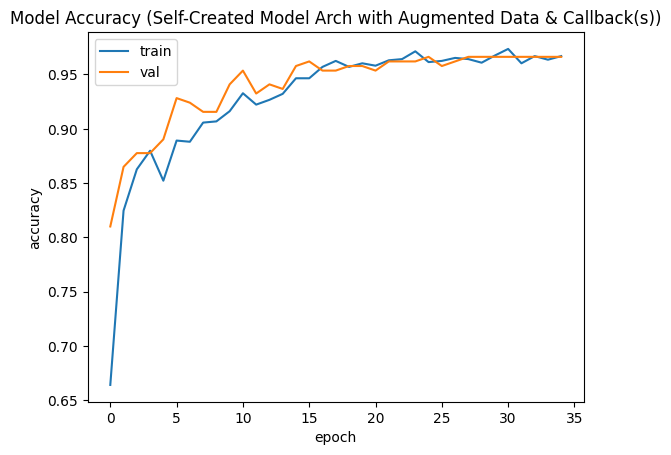

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

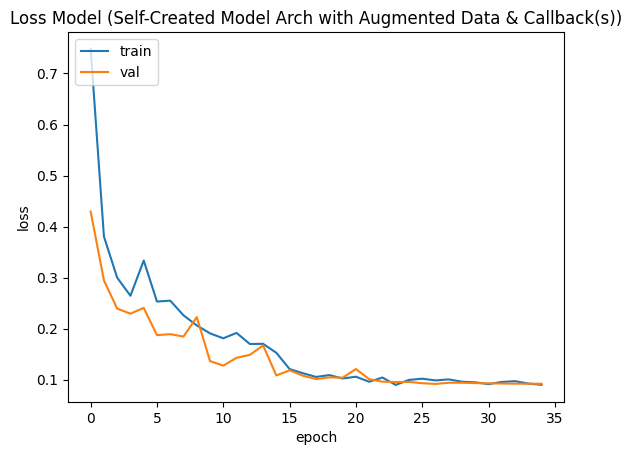

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Xception) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               524544    
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,386,281
Trainable params: 524,801
Non-trainable params: 20,861,480
___________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

Found 1814 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/xception'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.9024
Epoch 1: val_accuracy improved from -inf to 0.96624, saving model to /content/checkpoint/xception
57/57 [==============================] - 56s 938ms/step - loss: 0.2891 - accuracy: 0.9024 - val_loss: 0.0773 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9465
Epoch 2: val_accuracy did not improve from 0.96624
57/57 [==============================] - 28s 491ms/step - loss: 0.1264 - accuracy: 0.9465 - val_loss: 0.0932 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.0825 - accuracy: 0.9669
Epoch 3: val_accuracy improved from 0.96624 to 0.98312, saving model to /content/checkpoint/xception
57/57 [==============================] - 48s 839ms/step - loss: 0.0825 - accuracy: 0.9669 - val_loss: 0.0394 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 4/50
57/57 [===============

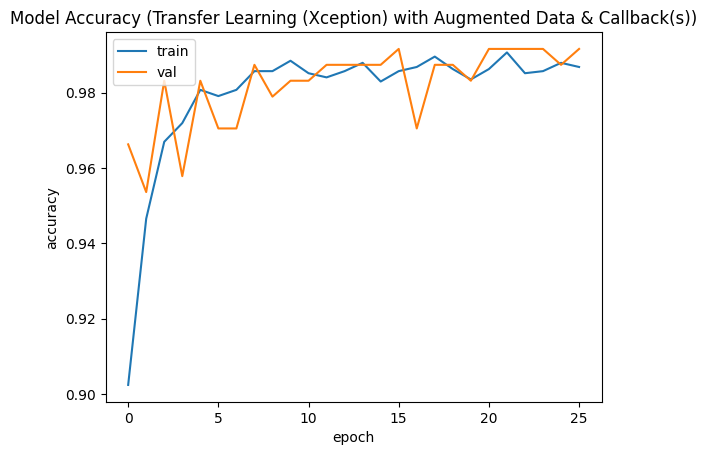

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

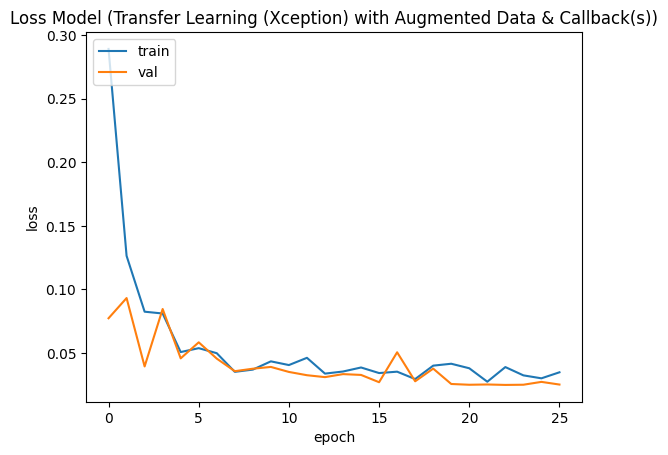

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (MobileNetV2) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = tf.keras.models.Sequential([
    # Xception Layer
    MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.layers[0].trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_3 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_22 (Dense)            (None, 256)               327936    
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2,586,177
Trainable params: 328,193
Non

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

Found 1814 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/mobilenetv2'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.9643 - accuracy: 0.8440
Epoch 1: val_accuracy improved from -inf to 0.96203, saving model to /content/checkpoint/mobilenetv2
57/57 [==============================] - 54s 869ms/step - loss: 0.9643 - accuracy: 0.8440 - val_loss: 0.1114 - val_accuracy: 0.9620 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.1342 - accuracy: 0.9476
Epoch 2: val_accuracy did not improve from 0.96203
57/57 [==============================] - 27s 466ms/step - loss: 0.1342 - accuracy: 0.9476 - val_loss: 0.0981 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9680
Epoch 3: val_accuracy improved from 0.96203 to 0.97890, saving model to /content/checkpoint/mobilenetv2
57/57 [==============================] - 48s 851ms/step - loss: 0.0824 - accuracy: 0.9680 - val_loss: 0.0563 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 4/50
57/57 [=========

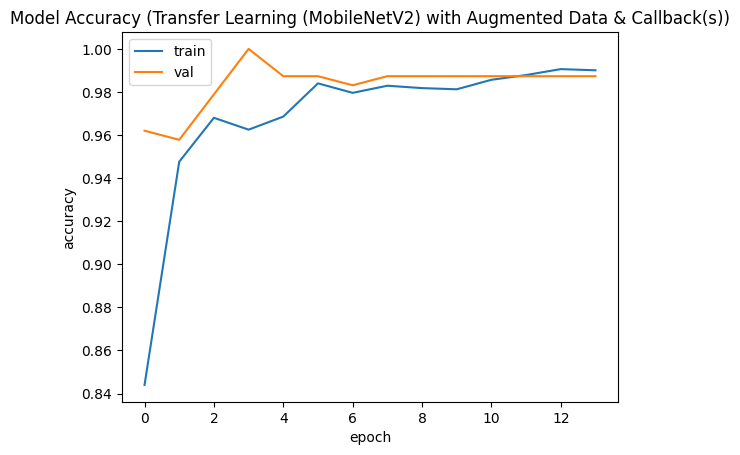

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

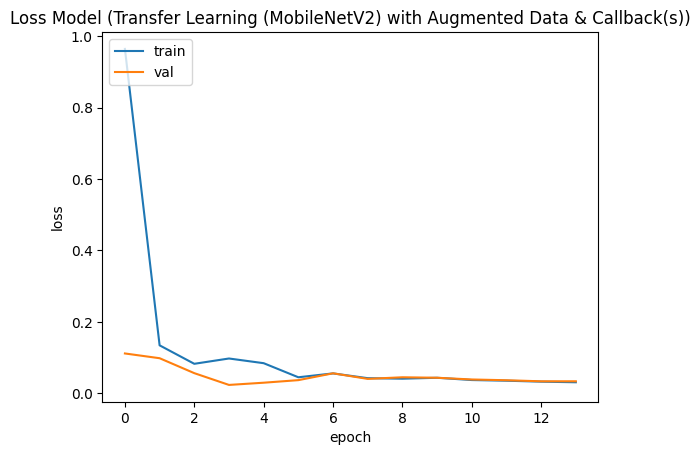

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Densenet121) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
model = tf.keras.models.Sequential([
    # Xception Layer
    DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.layers[0].trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d_4 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               262400    
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 7,300,161
Trainable params: 262,657
Non-trainable params: 7,037,504
_____________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

Found 1814 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/densenet121'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.6322 - accuracy: 0.8627
Epoch 1: val_accuracy improved from -inf to 0.97468, saving model to /content/checkpoint/densenet121
57/57 [==============================] - 98s 2s/step - loss: 0.6322 - accuracy: 0.8627 - val_loss: 0.0651 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.9631
Epoch 2: val_accuracy improved from 0.97468 to 0.98312, saving model to /content/checkpoint/densenet121
57/57 [==============================] - 80s 1s/step - loss: 0.1080 - accuracy: 0.9631 - val_loss: 0.0707 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9653
Epoch 3: val_accuracy improved from 0.98312 to 0.99156, saving model to /content/checkpoint/densenet121
57/57 [==============================] - 80s 1s/step - loss: 0.0996 - accuracy: 0.9653 - val_loss: 0.0335 - val_accuracy: 0.9

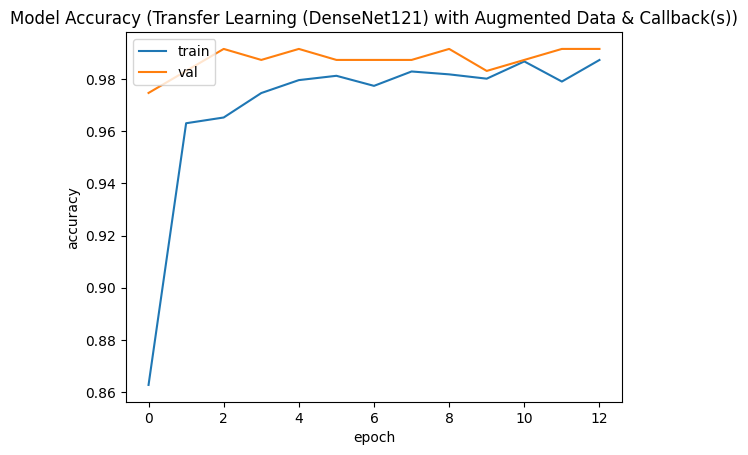

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

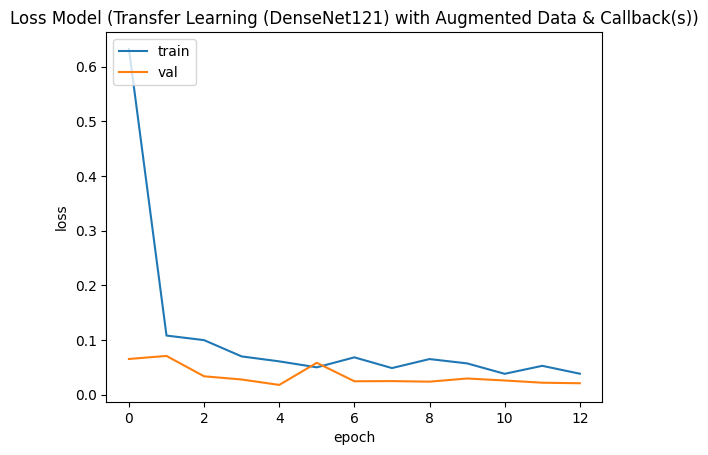

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/apple_self_created.zip /content/checkpoint/self_created
!zip -r /content/apple_xception.zip /content/checkpoint/xception
!zip -r /content/apple_mobilenetv2.zip /content/checkpoint/mobilenetv2
!zip -r /content/apple_densenet121.zip /content/checkpoint/densenet121

  adding: content/checkpoint/self_created/ (stored 0%)
  adding: content/checkpoint/self_created/saved_model.pb (deflated 88%)
  adding: content/checkpoint/self_created/fingerprint.pb (stored 0%)
  adding: content/checkpoint/self_created/assets/ (stored 0%)
  adding: content/checkpoint/self_created/keras_metadata.pb (deflated 91%)
  adding: content/checkpoint/self_created/variables/ (stored 0%)
  adding: content/checkpoint/self_created/variables/variables.data-00000-of-00001 (deflated 33%)
  adding: content/checkpoint/self_created/variables/variables.index (deflated 63%)
  adding: content/checkpoint/xception/ (stored 0%)
  adding: content/checkpoint/xception/saved_model.pb (deflated 92%)
  adding: content/checkpoint/xception/fingerprint.pb (stored 0%)
  adding: content/checkpoint/xception/assets/ (stored 0%)
  adding: content/checkpoint/xception/keras_metadata.pb (deflated 96%)
  adding: content/checkpoint/xception/variables/ (stored 0%)
  adding: content/checkpoint/xception/variables/

In [ ]:
from google.colab import files

files.download("/content/apple_self_created.zip")
files.download("/content/apple_xception.zip")
files.download("/content/apple_mobilenetv2.zip")
files.download("/content/apple_densenet121.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>